## Measuring the Variance to Mean Ratio##

In neurons there tends to be a strong linear dependence of the variance on the mean. We would like to measure both the strength of this relationship and the parameters of this relationship as best we can. There are a variety of choices both in analysis and experiment that can be adjusted to optimize the accuracy of this measurement as indexed by the bias and variance. To determine these trade offs requires a model.

One issue is that not all neurons have a linear relationship between their mean and their variance. The model of tria-to-trial variability I have developed only accounts for a linear relationship and thus my interest is focused on those neurons which have a linear variance to mean relationship and thus I need a test for excluding a neuron sensitive to whether it deviates from a linear fit to its sample variances and mean.

Given that it fits then I need a method for best estimating the VMR.


### Analysis###

$\hat{\mu} = $ estimator of mean

$\hat{\sigma}^2= $ estimator of variance 

$\hat{\beta} = $ estimator of the relationship between variance and mean.


### Experiment###
$n = $ number of stimuli

$m = $ number of trials

$d = $ dynamic range of neuron.





### Model###
We can work this out for models of increasing complexity starting with a simple normal model.

$$Y_i \sim N(\mu_i, \beta \mu_i)$$ with $\beta$ and $\mu_i$ unknown and we want to estimate $\beta$

We can take estimators of the mean and the variance:
$$\hat{\mu_i} = \frac{1}{m}\sum_j^m{Y_{ij}}$$
$$\hat{\sigma_i^2} = \frac{1}{m-1}\sum_j^m{(Y_{ij}-\hat{\mu_i})^2}$$

So we have $n+1$ ($\mu_i$ and $\beta$) parameters we need to estimate and $nm$ data points. 

The natural exponential parameters in the case n=1 are ($\frac{1}{\beta}$ , $- \frac{1}{2 \beta \mu}$) which spans a 2-d space which implies that ($\sum_i^m{x_i}$, $\sum_i^m{x_i^2}$) is the minimal sufficient statistic which has one-to-one transformation to $(\bar{x}, s^2)$=($\hat{\mu_i}, \hat{\sigma_i}^2$). Which in turn implies if we can find an unbiased estimator which is a function of these statistics we then have the minimal variance estimator


The distribution of these estimators in this case are:
$$\hat{\mu_i} \sim N(\mu_i, \frac{\beta \mu_i}{m})$$

$$\hat{\sigma_i^2} \sim \frac{\beta \mu_i}{m-1} \chi_{m-1}^2 $$

These are independent conditional on their parameters.
One way to estimate $\beta$ is via the coefficient of variation:

$$\frac{s^2}{\bar{x}}$$

Now we want to check whether it is unbiased:

we know that the two statistics are uncorrelated and so $E(\frac{s^2}{\bar{x}}) = E(\frac{s^2}{1})E(\frac{1}{\bar{x}}) = \frac{\beta \mu}{1} E(\frac{1}{\bar{x}})$

unfortunately $E(\frac{1}{\bar{x}})$ does not exist as the expectation goes to infinity when $x\xrightarrow{} 0$

One way to get around this is to truncate the distribution by only accepting neurons which have an average firing rate over 1, so you don't occasionally have the metric explode. Usually this won't cut off much of the distribution and by central limit theorem with more samples this expectation should be close to $\frac{1}{\mu}$

Since it is now a truncated exponential distribution the estimators are still minimal sufficient. Lets figure out using the delta method approximately what the variance of $\frac{1}{\bar{x}}$ is:

$$\sqrt{n}(g(\bar{x})-g(\mu)))\xrightarrow{} N(0,(\frac{d}{dx} g(\mu))^2 \beta \mu)$$

$$\sqrt{m}(\frac{1}{\bar{x}}-\frac{1}{\mu})\xrightarrow{} N(0,\frac{\beta }{\mu^3})$$

so $Var(\frac{1}{\bar{x}}) \approx \frac{\beta }{m \mu^3}$

Similarly we will approximate its expectations as $\frac{1}{\mu}$

and the variance of $s^2$ is:
$$Var(s^2) = \frac{2(\beta \mu)^2}{m-1}$$

and the expectation is:
$$E(s^2) = \beta \mu$$



Since X and Y are independent its pretty straightforward to get the $Var(\frac{s^2}{\bar{x}})$ if we ignore the excess moments and approximate  $s^2$ with a normal with the same mean and variance:

$$Var(XY) = \sigma^2_x \sigma^2_y + \mu_y^2 \sigma_x^2 + \mu_x^2 \sigma_y^2$$

$$Var(\frac{s^2}{\bar{x}}) = \frac{\beta }{m\mu^3} \frac{2(\beta \mu)^2}{m-1}+ (\beta \mu)^2 \frac{\beta }{m \mu^3} + \frac{1}{\mu^2}\frac{2(\beta \mu)^2}{m-1}$$

$$= \frac{\beta^3}{m \mu (m-1)} + \frac{\beta^3}{m \mu} + \frac{2 \beta^2}{m-1}$$

(10, 5, 10000)
(10, 10000)
(10, 10000)


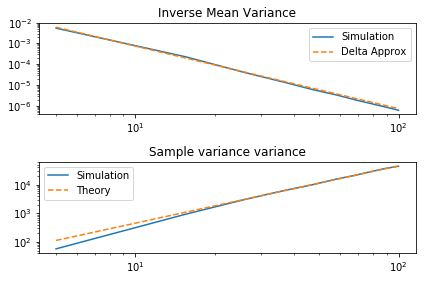

In [36]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import numpy as np
nsim = 10000
m = 5
vmr = 3
nmu = 10
mus = np.linspace(5, 100, nmu)
x = np.array([np.random.normal(mu, (vmr*mu)**0.5, (m, nsim)) for mu in mus])
print(x.shape)
invxbar = np.zeros((nmu,nsim))
#for i, a_x in enumerate(x):
#    invxbar[i,:] = np.array([np.mean(a_a_x[a_a_x>1], 0)**-1 for a_a_x in a_x.T])
x[x<1] = 1
invxbar = np.mean(x,1)**-1
print(invxbar.shape)

invxbarvar = [np.var(a_invxbar, ddof=1) for a_invxbar in invxbar]
plt.subplot(211)
plt.loglog(mus, invxbarvar)
invbar_theor = ((m-1)**-1)*(mus**-3)*vmr
plt.loglog(mus, invbar_theor,linestyle='--')
plt.title('Inverse Mean Variance')
plt.legend(['Simulation', 'Delta Approx'])

plt.subplot(212)
plt.title('Sample variance variance')

s2 = np.array([np.var(a_x, 0, ddof=1) for a_x in x])
print(s2.shape)
s2var = [np.var(a_s2, 0, ddof=1) for a_s2 in s2]

plt.loglog(mus, s2var);
plt.loglog(mus, ((2*(vmr*mus)**2)) / ((m-1)), linestyle='--')
plt.legend(['Simulation', 'Theory']);

plt.tight_layout()



Notes, the delta approximation seems to improve with lower b, be worse for smaller $\mu$ is essentially exponential. 

(100, 10, 50000)
(100, 10000)


(0, 2.6666666666666665)

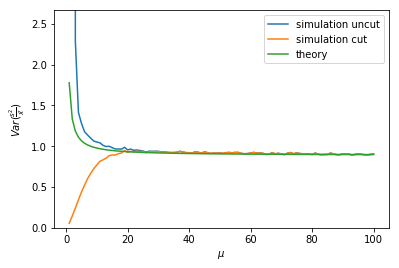

In [100]:
m = 10
mus = np.linspace(1,100,100)
vmr = 2

x = np.array([np.random.normal(mu, (vmr*mu)**0.5, (m, 50000)) for mu in mus])
print(x.shape)
est_no_cut = (np.var(x,1, ddof=1)/np.mean(x, 1))
print(est.shape)
plt.plot(mus,est_no_cut.var(-1))

x[x<1] = 1
est_cut = (np.var(x,1, ddof=1)/np.mean(x, 1))
plt.plot(mus, est_cut.var(-1))

theory = (vmr**3)/(mus*m*(m-1)) + (vmr**3)/(mus*m) + (2*vmr**2)/(m-1)
plt.plot(mus, theory)

plt.xlabel(r'$\mu$')
plt.ylabel(r'$Var(\frac{s^2}{\bar{x}})$')

plt.legend(['simulation uncut', 'simulation cut','theory'])
plt.ylim(0, np.max(theory)*1.5)


We find that if we do not cut off the averages when they get too small the estimates blow up explaining the deviation for small $m$ when the variance is too high from theory. Whereas if we set values less than 1 equal to 1, we get far less variance for smaller means because everything is being sucked into 1, but this is obviously increasing bias. Its seems to be generally we want large m to prevent this blow up problem for lower means. We also may want to consider the trade off of even including estimates from low means. 

What does the MSE look like?

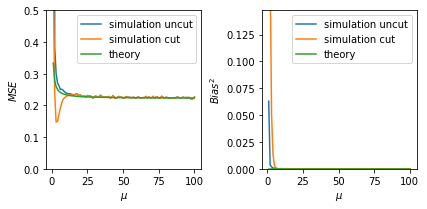

In [99]:
plt.figure(figsize=(6,3))
plt.subplot(121)
plt.plot(mus, np.mean((est_no_cut-vmr)**2,1))
plt.plot(mus, np.mean((est_cut-vmr)**2, 1))

theory = (vmr**3)/(mus*m*(m-1)) + (vmr**3)/(mus*m) + (2*vmr**2)/(m-1)
plt.plot(mus, theory)

plt.xlabel(r'$\mu$')
plt.ylabel(r'$MSE$')
plt.legend(['simulation uncut', 'simulation cut','theory'])
plt.ylim(0, np.max(theory)*1.5)

plt.subplot(122)
plt.plot(mus, np.mean((est_no_cut-vmr),1)**2)
bias_cut = np.mean((est_cut-vmr),1)**2
plt.plot(mus, bias_cut)

plt.plot(mus, [0,]*len(mus))

plt.xlabel(r'$\mu$')
plt.ylabel(r'$Bias^2$')
plt.legend(['simulation uncut', 'simulation cut','theory'])
plt.ylim(0,np.max(bias_cut));
plt.tight_layout()

Now to further reduce our MSE because it is largely driven by variance rather than bias is to average:

$$ \hat{\beta} = \frac{1}{n}\sum_i^n{\frac{s^2_i}{\bar{x}_i}}$$

$$ Var(\hat{\beta}) \approx \frac{2 \beta^2}{n(m-1)}$$

so minimizing the variance is a matters of maximizing the denominator which for a fixed n+m is the case at: $n=m-1$

I think this is close to the best we can do, but we should consider regression methods.

Another way to estimate $\beta$ is via linear regression:

Our model is:

$\sigma_i^2 = \beta \mu_i + \epsilon (\beta\mu_i)$


We estimate $\beta$ by solving the equation:

$\hat{\sigma_i^2} = \beta \hat{\mu_i}$

with least squares:

$$\hat{\beta} = \frac{\sum_i^n{[\hat{\sigma_i^2} \hat{\mu_i}]}}{\sum_i^n{[\hat{\mu_i} ]^2}}$$

now to find the approximate distribution of $\hat{\beta}$ we will use the $\delta$ method to do this we need:

$E([\hat{\sigma_i^2} \hat{\mu_i}]) = \beta$

$E([\hat{\mu_i} ]^2)$

$Var([\hat{\sigma_i^2} \hat{\mu_i}])$

$Var([\hat{\mu_i} ]^2)$

and

$Cov([\hat{\sigma_i^2} \hat{\mu_i}], [\hat{\mu_i} ]^2)$


A major problem here is that these are not IID our means and variances are changing. 
And also 

In [56]:
lambdas.shape

(200,)

(1000, 100)


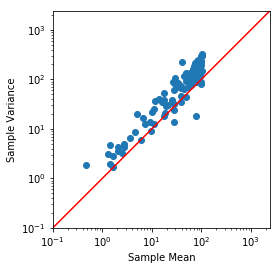

In [320]:
amplitude = 49
base_line = 50
true_r2 = 0.8
n_exps = 1000
vmr = 2
n = 10
m = 100
angle = np.arccos(true_r2**0.5)
#create the expected responses
lambdas = base_line + (np.cos(np.linspace(0, 2*np.pi, m))*amplitude) #s
y = np.random.poisson(lambdas, size=(n_exps, n, m)) # n_experiments n_trials m_stimuli
y = np.random.normal(lambdas, np.sqrt(vmr*lambdas), size=(n_exps, n, m)) # n_experiments n_trials m_stimuli

y_mean = y.mean(1) # average the trials
y_var = y.var(1, ddof=1)
plt.scatter(y_mean[0], y_var[0])
ax = plt.gca()
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')
plt.axis('square')
plt.xlim([0.1,base_line*amplitude]);plt.ylim([0.1,base_line*amplitude])
plt.plot([0.1,base_line*amplitude],[0.1,base_line*amplitude], color='r')
plt.xlabel('Sample Mean');plt.ylabel('Sample Variance')
print(y_mean.shape)

In [323]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd
slopes = []
exps = []
linslope = []
for i in range(n_exps):
    df = pd.DataFrame(np.array([np.log(y_mean[i]), np.log(y_var[i])]).T, columns=['mean', 'var'])
    mod = (ols('var ~ mean', data=df).fit())
    exps.append(mod.params[1])
    slopes.append(mod.params[0])
    df = pd.DataFrame(np.array([y_mean[i], y_var[i]]).T, columns=['mean', 'var'])
    mod = (ols('var ~ mean -1', data=df).fit())
    linslope.append(mod.params[0])

/home/dean/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in log


0.17390354327811311

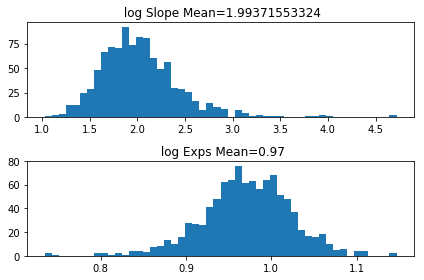

In [324]:
plt.subplot(311)
slopes = np.array(slopes)[~np.isinf(slopes)]
plt.hist(np.exp(slopes), bins=50);
plt.title(' log Slope Mean=' + str(np.exp(np.round(np.mean(slopes),2))))

plt.subplot(312)
exps = np.array(exps)[~np.isinf(slopes)]
plt.hist(exps, bins=50);
plt.title(' log Exps Mean=' + str(np.round(np.mean(exps),2)))
plt.tight_layout()

plt.subplot(312)
exps = np.array(exps)[~np.isinf(slopes)]
plt.hist(exps, bins=50);
plt.title(' log Exps Mean=' + str(np.round(np.mean(exps),2)))
plt.tight_layout()

np.sum((exps - 1)**2)/1000
np.sum((np.exp(slopes) - vmr)**2)/1000

In [201]:
print(mod.summary2())
print(np.exp(-1))

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.829    
Dependent Variable: var              AIC:                1065.9584
Date:               2018-07-06 13:27 BIC:                1068.5635
No. Observations:   100              Log-Likelihood:     -531.98  
Df Model:           1                F-statistic:        484.5    
Df Residuals:       99               Prob (F-statistic): 6.41e-40 
R-squared:          0.830            Scale:              2469.5   
---------------------------------------------------------------------
          Coef.     Std.Err.       t       P>|t|     [0.025    0.975]
---------------------------------------------------------------------
mean      1.9036      0.0865    22.0116    0.0000    1.7320    2.0752
------------------------------------------------------------------
Omnibus:              79.698       Durbin-Watson:          2.377  
Prob(Omnibus):        0.000        Jarque-Bera (JB):       666.803


0.098939797030805077

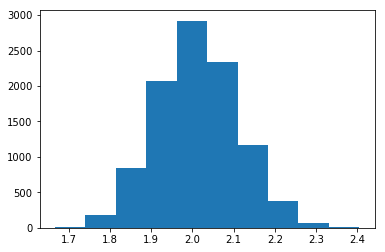

In [194]:
est = (y_var/y_mean).mean(1)
plt.hist(est)
np.sum((est - vmr)**2)/1000


Taking logs:
$log(\sigma_i^2) = log(\beta) + log(\mu_i)$

Here $\beta = \frac{1}{n} \sum_i^n{\log(\sigma_i^2)} - \frac{1}{n} \sum_i^n{\log(\mu_i)}$

Our estimator of $\beta$ will be:

$\hat{\beta} = \frac{1}{n} \sum_i^n{\log(\hat{\sigma_i^2})} - \frac{1}{n} \sum_i^n{\log(\hat{\mu_i})}$